In [11]:
# Usefull imports
import numpy as np
import matplotlib.pyplot as plt
import time

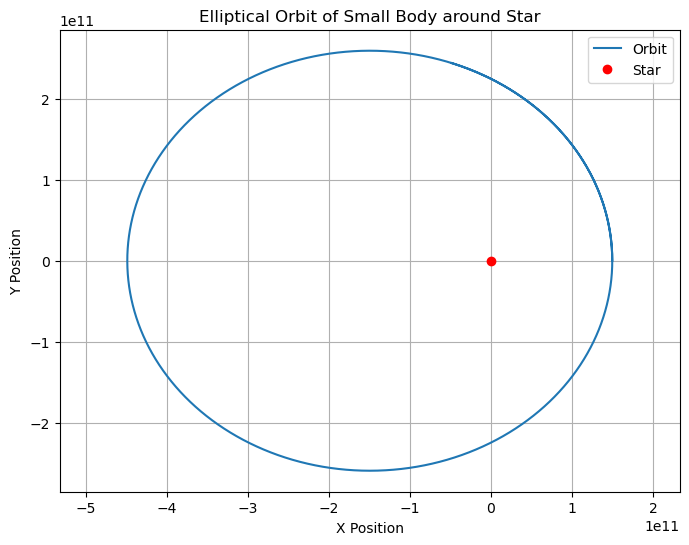

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class TwoBodySolver:
    '''
    This class simulates the motion of a small body around a star under the influence of Newtonian gravity.
    '''
    def __init__(self, m_star, m_body, r_start, eccentricity, G=6.67430e-11):
        self.G = G
        self.m_star = m_star
        self.m_body = m_body
        self.r_start = r_start
        self.eccentricity = eccentricity
        self.r_star = np.array([0, 0])  # Star initially at origin
        self.r_body = np.array([self.r_start, 0])  # Body initially at distance r_start from star along x-axis
        
        # Compute semi-major axis based on initial distance and eccentricity
        a = np.linalg.norm(self.r_body)
        
        # Compute initial velocity components for elliptical orbit
        v_tangent = np.sqrt(self.G * m_star * (1 + eccentricity) / a)  # Tangential component
        v_radial = 0  # Radial component (set to 0 for simplicity)
        
        self.v_star = np.array([0, 0])  # Star initially at rest
        self.v_body = np.array([v_radial, v_tangent])  # Body with elliptical orbit initial velocity

    def update_position_velocity(self, dt):
        k1_r, k1_v = self._compute_derivatives(self.r_body, self.v_body)
        k2_r, k2_v = self._compute_derivatives(self.r_body + 0.5 * dt * k1_r, self.v_body + 0.5 * dt * k1_v)
        
        self.r_body += dt * k2_r
        self.v_body += dt * k2_v

    def _compute_derivatives(self, r, v):
        r_star = self.r_star
        r_norm = np.linalg.norm(r - r_star)
        
        F = -self.G * self.m_star * self.m_body / r_norm**3 * (r - r_star)
        return v, F / self.m_body

def plot_orbit(solver, num_steps, dt):
    positions = np.zeros((num_steps, 2))
    for i in range(num_steps):
        positions[i] = solver.r_body
        solver.update_position_velocity(dt)
        
    plt.figure(figsize=(8, 6))
    plt.plot(positions[:, 0], positions[:, 1], label='Orbit')
    plt.plot(0, 0, 'ro', label='Star')  # Star at origin
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Elliptical Orbit of Small Body around Star')
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
m_star = 1.989e30  # Mass of the star (e.g., Sun) in kg
m_body = 5.972e24  # Mass of the small body (e.g., Earth) in kg
r_start = 1.496e11  # Initial distance of the small body from the star in meters (e.g., Earth-Sun distance)
eccentricity = 0.5  # Eccentricity of the elliptical orbit
num_steps = 10000  # Number of time steps
dt = 10000  # Time step size in seconds

# Create solver instance
solver = TwoBodySolver(m_star, m_body, r_start, eccentricity)

# Plot orbit
plot_orbit(solver, num_steps, dt)
